In [10]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 

In [2]:
filenameData = "TCGA-GBM-Data.csv"
filenameMetaData = "TCGA-GBM-MetaData.csv"

df = pd.DataFrame()
for chunk in pd.read_csv("../data/subsets/"+filenameData, chunksize=10**3):
    df = pd.concat([df, chunk], ignore_index=True)

gbmData = df.values

df = pd.DataFrame()
for chunk in pd.read_csv("../data/subsets/"+filenameMetaData, chunksize=10**3):
    df = pd.concat([df, chunk], ignore_index=True)

gbmMetaData = df.values

In [3]:
filenameData = "TCGA-PAAD-Data.csv"
filenameMetaData = "TCGA-PAAD-MetaData.csv"

df = pd.DataFrame()
for chunk in pd.read_csv("../data/subsets/"+filenameData, chunksize=10**3):
    df = pd.concat([df, chunk], ignore_index=True)

paadData = df.values

df = pd.DataFrame()
for chunk in pd.read_csv("../data/subsets/"+filenameMetaData, chunksize=10**3):
    df = pd.concat([df, chunk], ignore_index=True)

paadMetaData = df.values

In [4]:
X = np.concatenate((gbmData[:,1:],paadData[:,1:]),axis=0)

In [5]:
X.shape

(333, 55541)

In [6]:
pca = PCA(n_components=3, svd_solver='full')
pca.fit(X)
transformed = pca.transform(X)

In [7]:
pca.explained_variance_ratio_

array([ 0.49362051,  0.04229654,  0.03692534])

<IPython.core.display.Javascript object>


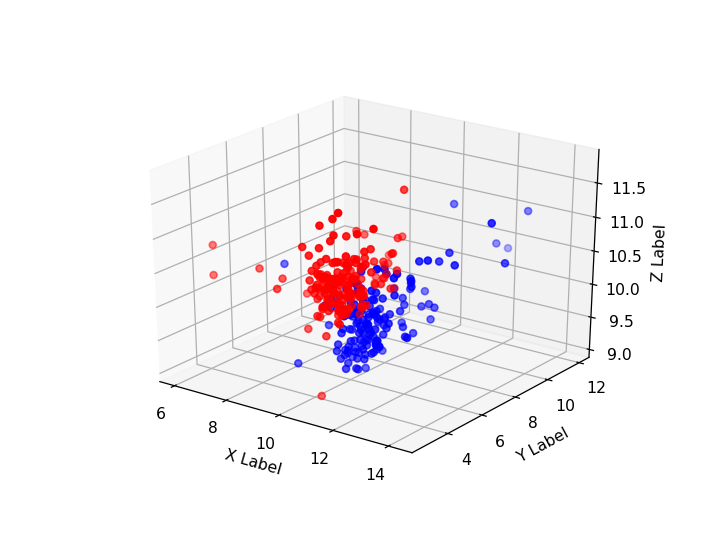

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X[:,0]
y = X[:,1]
z = X[:,2]
colors = np.transpose(np.concatenate((["blue"]*gbmData.shape[0],["red"]*paadData.shape[0]),axis=0))

ax.scatter(x,y,z, c=colors, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()